## Load libraries

In [41]:
# Libraries to work with dataset
import pandas as pd
# import numpy as np

# Libraries to preprocess text
import nltk
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
# from collections import Counter
# from rake_nltk import Metric, Rake
# import spacy
# import pytextrank
import pke

# Library to create embeddings
from gensim.models import Word2Vec

# Libraries to cluster data

# Libraries to visualize data
import seaborn as sns
# from icecream import ic

# Libraries to speed up processing
# import dask.dataframe as dd
# from dask.multiprocessing import get
# import timeit
# import time
# import concurrent.futures
# from functools import partial

# Download neccessary resources
# nltk.download('punkt')
# nltk.download('stopwords')

## Import data

In [2]:
BASE_DIR = "E:/THIENDHB_GOOGLEDRIVE/MASTER TILBURG/THESIS/"
INPUT_DIR = BASE_DIR + "DATASET/INPUT/"
OUTPUT_DIR = BASE_DIR + "DATASET/OUTPUT/"

df_raw = pd.read_csv(INPUT_DIR + "refined_jobpost_data.csv")
pd.set_option('display.max_colwidth', None)

## Explore data

In [4]:
df_raw.shape

(18992, 5)

In [5]:
df_raw.head(3)

,job_id,job_title,job_description,job_requirement,job_qualification
0,1,Chief Financial Officer,"AMERIA Investment Consulting Company is seeking a\r\nChief Financial Officer. This position manages the company's fiscal and\r\nadministrative functions, provides highly responsible and technically\r\ncomplex staff assistance to the Executive Director. The work performed\r\nrequires a high level of technical proficiency in financial management\r\nand investment management, as well as management, supervisory, and\r\nadministrative skills.","- Supervises financial management and administrative staff, including\r\nassigning responsibilities, reviewing employees' work processes and\r\nproducts, counseling employees, giving performance evaluations, and\r\nrecommending disciplinary action;\r\n- Serves as member of management team participating in both strategic\r\nand operational planning for the company;\r\n- Directs and oversees the company's financial management activities,\r\nincluding establishing and monitoring internal controls, managing cash\r\nand investments, and managing the investment portfolio in collaboration\r\nwith the Investment team leader. This includes, but is not limited to,\r\nevaluation of investment risk, concentration risk, fund deployment\r\nlevels, adequacy of loss and liquidity reserves Assists investment team\r\nin development of proper documentation and internal systems;\r\n- Directs and oversees the annual budgeting process, including\r\ndeveloping projections for financial planning, and preparing budgets;\r\n- Prepares external and internal financial management reports, such as\r\naudited financial statements, tax returns, and reports for the board of\r\ndirectors and company staff;\r\n- Develops, implements, and maintains efficient and effective accounting\r\nsystems and controls to ensure compliance with national and\r\ninternational accounting standards and principles, sufficiency of fund\r\naccounting, and comprehensiveness of data for reporting and compliance\r\nrequirements;\r\n- Ensures contract compliance, including interpreting and monitoring\r\ncontracts with clients, submitting required reports, and monitoring\r\ncovenants and other contract terms;\r\n- Oversees the design, implementation and maintenance of computer-based\r\ninformation system. Oversees records retention (both manual and\r\ncomputer-based) and file maintenance activities;\r\n- Serves as company's risk manager, including evaluating loss exposure\r\nand obtaining insurance as appropriate;\r\n- Manages other administrative operations, such as facilities\r\nmanagement, payroll administration, office operations, and\r\nadministrative support;\r\n- Monitors corporate compliance with by-laws and articles of\r\nincorporation regarding corporate registration and reporting of\r\nfundraising operations.","To perform this job successfully, an\r\nindividual must be able to perform each essential duty satisfactorily.\r\nThe requirements listed below are representative of the knowledge,\r\nskill, and/or ability required.\r\nKnowledge of:\r\n- Generally accepted accounting principles;\r\n- Local accounting standards and legislation;\r\n- State reporting requirements pertaining to accounting;\r\n- Principles and practices of financial management and budgeting;\r\n- Principles and practices of financial systems design and analysis;\r\n- Principles and practices of contract management, records management,\r\nand risk management;\r\n- Principles and practices of management and supervision;\r\n- Principles and practices of information systems management.\r\nAbility to:\r\n- Apply sound fiscal and administrative practices to the company's\r\nactivities;\r\n- Plan, organize and supervise the work of subordinate employees,\r\nincluding training them, assigning and evaluating their work, and\r\nproviding job performance feedback;\r\n- Critically analyze fiscal and administrative policies, practices,\r\nprocedures, and systems, and recommend and implemen

In [6]:
df_raw.columns.values

array(['job_id', 'job_title', 'job_description', 'job_requirement',
       'job_qualification'], dtype=object)

### Treating missing data

In [3]:
# Detecting missing values
def missing_values_table(df):

    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_columns = mis_val_table.rename(
        columns={0: "Missing Values", 1: "% of Total Values"}
    )

    # Sort the table by percentage of missing descending
    # .iloc[:, 1]!= 0: filter on missing missing values not equal to zero
    mis_val_table_columns = (
        mis_val_table_columns[mis_val_table_columns.iloc[:, 1] != 0]
        .sort_values("% of Total Values", ascending=False)
        .round(2)
    )  # round(2), keep 2 digits
    # Print some summary information
    print(
        "Dataset has {} columns.".format(df.shape[1])
        + "\n"
        + "There are {} columns that have missing values.".format(
            mis_val_table_columns.shape[0]
        )
    )

    # Return the dataframe with missing information
    return mis_val_table_columns

In [8]:
missing_values_table(df_raw)

Dataset has 5 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values
job_description,3411,17.96
job_requirement,2508,13.21
job_qualification,472,2.49


<AxesSubplot:>

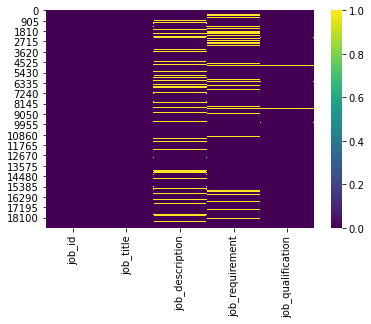

In [9]:
sns.heatmap(df_raw.isnull(), cmap='viridis')

In [4]:
# Replace missing values with "No information"
df = df_raw.copy(deep=True)
df.fillna('Unprovided', inplace=True)
df.head(3)

,job_id,job_title,job_description,job_requirement,job_qualification
0,1,Chief Financial Officer,"AMERIA Investment Consulting Company is seeking a\r\nChief Financial Officer. This position manages the company's fiscal and\r\nadministrative functions, provides highly responsible and technically\r\ncomplex staff assistance to the Executive Director. The work performed\r\nrequires a high level of technical proficiency in financial management\r\nand investment management, as well as management, supervisory, and\r\nadministrative skills.","- Supervises financial management and administrative staff, including\r\nassigning responsibilities, reviewing employees' work processes and\r\nproducts, counseling employees, giving performance evaluations, and\r\nrecommending disciplinary action;\r\n- Serves as member of management team participating in both strategic\r\nand operational planning for the company;\r\n- Directs and oversees the company's financial management activities,\r\nincluding establishing and monitoring internal controls, managing cash\r\nand investments, and managing the investment portfolio in collaboration\r\nwith the Investment team leader. This includes, but is not limited to,\r\nevaluation of investment risk, concentration risk, fund deployment\r\nlevels, adequacy of loss and liquidity reserves Assists investment team\r\nin development of proper documentation and internal systems;\r\n- Directs and oversees the annual budgeting process, including\r\ndeveloping projections for financial planning, and preparing budgets;\r\n- Prepares external and internal financial management reports, such as\r\naudited financial statements, tax returns, and reports for the board of\r\ndirectors and company staff;\r\n- Develops, implements, and maintains efficient and effective accounting\r\nsystems and controls to ensure compliance with national and\r\ninternational accounting standards and principles, sufficiency of fund\r\naccounting, and comprehensiveness of data for reporting and compliance\r\nrequirements;\r\n- Ensures contract compliance, including interpreting and monitoring\r\ncontracts with clients, submitting required reports, and monitoring\r\ncovenants and other contract terms;\r\n- Oversees the design, implementation and maintenance of computer-based\r\ninformation system. Oversees records retention (both manual and\r\ncomputer-based) and file maintenance activities;\r\n- Serves as company's risk manager, including evaluating loss exposure\r\nand obtaining insurance as appropriate;\r\n- Manages other administrative operations, such as facilities\r\nmanagement, payroll administration, office operations, and\r\nadministrative support;\r\n- Monitors corporate compliance with by-laws and articles of\r\nincorporation regarding corporate registration and reporting of\r\nfundraising operations.","To perform this job successfully, an\r\nindividual must be able to perform each essential duty satisfactorily.\r\nThe requirements listed below are representative of the knowledge,\r\nskill, and/or ability required.\r\nKnowledge of:\r\n- Generally accepted accounting principles;\r\n- Local accounting standards and legislation;\r\n- State reporting requirements pertaining to accounting;\r\n- Principles and practices of financial management and budgeting;\r\n- Principles and practices of financial systems design and analysis;\r\n- Principles and practices of contract management, records management,\r\nand risk management;\r\n- Principles and practices of management and supervision;\r\n- Principles and practices of information systems management.\r\nAbility to:\r\n- Apply sound fiscal and administrative practices to the company's\r\nactivities;\r\n- Plan, organize and supervise the work of subordinate employees,\r\nincluding training them, assigning and evaluating their work, and\r\nproviding job performance feedback;\r\n- Critically analyze fiscal and administrative policies, practices,\r\nprocedures, and systems, and recommend and implemen

In [5]:
title_df = df.loc[1:5, ["job_title"]]
title_df

,job_title
1,Full-time Community Connections Intern (paid internship)
2,Country Coordinator
3,BCC Specialist
4,Software Developer
5,Saleswoman


In [6]:
skill_columns = ["job_description", "job_requirement", "job_qualification"]
skill_df = df.loc[1:5, skill_columns]
skill_df

,job_description,job_requirement,job_qualification
1,IREX currently seeks to fill the position of a paid\r\nIntern for the Community Connections (CC) Program. The position is based\r\nin the Yerevan office however applicants must be willing to travel\r\nthroughout Armenia as necessary. This position reports directly to the\r\nCC Program Manager.,"- Presenting the CC program to interested parties; \r\n- Assisting in planning and scheduling of programmatic meetings and\r\nevents (this includes coordinating logistics for CC staff, visitors and\r\nparticipants);\r\n- Assisting the Program Staff;\r\n- Translation/Interpretation from Armenian to English and vice versa;\r\n- Helping create, maintain and update the CC filing system and\r\ndatabases;\r\n- Completing general administrative tasks for the CC program within the\r\noffice;\r\n- Other duties as assigned/ needed.",- Bachelor's Degree; Master's is preferred;\r\n- Excellent skills in spoken and written English and Armenian languages;\r\n- Past English to Armenian translation and Armenian to English\r\ntranslation experience;\r\n- Good communication and public speaking skills;\r\n- Ability to work independently and as part of a team.\r\nREMUNERATION: Commensurate with experience.
2,"Public outreach and strengthening of a growing\r\nnetwork of environmental NGOs, businesses, international organizations\r\nand public agencies. Will serve as primary contact between CENN and\r\npublic. This is a full-time position.","- Working with the Country Director to provide environmental information\r\nto the general public via regular electronic communications and serving\r\nas the primary local contact to Armenian NGOs and businesses and the\r\nArmenian offices of international organizations and agencies;\r\n- Helping to organize and prepare CENN seminars/ workshops;\r\n- Participating in defining the strategy and policy of CENN in Armenia,\r\nthe Caucasus region and abroad.","- Degree in environmentally related field, or 5 years relevant\r\nexperience;\r\n- Oral and written fluency in Armenian, Russian and English;\r\n- Knowledge/ experience of working with environmental issues specific to\r\nArmenia is a plus.\r\nREMUNERATION: Salary commensurate with experience."
3,"The LEAD (Local Enhancement and Development for\r\nHealth) BCC Specialist will apply state-of-the-art approaches in working\r\nwith LGUs (Local Government Units) and NGOs to help them to identify and\r\naddress provider-caused barriers to service provision as well as to\r\nidentify and address supports for good service delivery by developing\r\ntools that may be adapted to each LGU's needs. S/he will work with LEAD\r\nstaff across all components to support quality service delivery and will\r\nalso monitor implementation of improved service delivery in LGUs, and\r\nwill provide additional assistance to LGUs and NGOs, as needed. S/he\r\nwill collect all relevant published and grey literature documents,\r\nidentify gaps in knowledge, and work with NGOs and consultants to fill\r\nin the gaps. S/he will establish training for NGOs and LGU\r\nadministration staff pursuing service enhancement and provider behavior\r\nchange and will oversee the training. S/he will serve as the Project's\r\nprimary liaison to TSAP and other projects and organizations working in\r\nbehavior change.","- Identify gaps in knowledge and overseeing information collection to\r\nfill them;\r\n- Consolidate partnerships with center of excellence of technical\r\nsupport, working with local NGOs/COs, LCEs, and LGUs;\r\n- Work with LEAD team to develop assessment tools for LGUs to identify\r\nbarriers and supports to quality service provision;\r\n- Assist LGUs and NGOs to design and implement multifaceted (if\r\nnecessary), systematic interventions, based on assessment results, to\r\nenhance quality service provision, especially through provider behavior\r\nchange. For example, ensure that not only providers, but their\r\nsupervisors are trained and that monitori

## Text preprocessing

- Removing URL
- Lowercasing
- Removing irrelevant characters (punctuation, numbers)
- Removing stopwords
- POS tagging
- Lemmatization

In [20]:
def nltk_tag_to_wordnet_tag(nltk_tag):
    """Helper function to convert nltk POS tags to wordnet POS tags"""
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None


def lemmatize(token):
    lemmatizer = WordNetLemmatizer()
    nltk_tagged = nltk.pos_tag(token)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            # if no tag found then use as it is
            lemmatized_sentence.append(word)
        else:
            # else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))

    return " ".join(lemmatized_sentence)


stop_words = set(stopwords.words("english"))
spec_chars = string.punctuation + string.digits


def pre_process(text, spec_chars=spec_chars, stop_words=stop_words):
    """Function to pre process text once for all steps:
    - Removing URLs
    - Removing stop words
    - Removing special characters and numbers
    - Lowercasing
    - POS tagging
    - Lemmatizing

    Inputs:
    - text: raw text to normalize
    - spec_chars: list of special characters to remove
    - stop_words: set of stopwords to remove

    Return: normalized text
    """
    # convert to string
    text = str(text)

    # lowercasing
    text = text.lower()

    # remove URLs
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"www\S+", "", text)

    # remove special characters and numbers
    text = text.translate(str.maketrans('', '', spec_chars))

    # tokenize
    tokens = nltk.word_tokenize(text)

    # remove stop words
    tokens = [word for word in tokens if word not in stop_words]

    # lemmatize
    tokens = lemmatize(tokens)

    return tokens

In [298]:
# text_columns = ["job_title",
#                 "job_description",
#                 "job_requirement",
#                 "job_qualification"]
# new_columns = [
#     "clean_job_title",
#     "clean_job_description",
#     "clean_job_requirement",
#     "clean_job_qualification"
# ]

In [23]:
clean_title_df = title_df.applymap(pre_process)
clean_title_df

,job_title
1,fulltime community connection intern pay internship
2,country coordinator
3,bcc specialist
4,software developer
5,saleswoman


In [7]:
# define the valid Part-of-Speeches to occur in the graph
pos = {"NOUN", "PROPN", "ADJ"}

# define the grammar for selecting the keyphrase candidates
grammar = "NP: {<ADJ>*<NOUN|PROPN>+}"


def extract_keyphrases(text, topn=10, window_size=10, grammar=grammar, pos=pos):

    # 1. create a PositionRank extractor.
    extractor = pke.unsupervised.PositionRank()

    # 2. load the content of the document.
    extractor.load_document(input=text,
                            language='en',
                            normalization='lemmatization')

    # 3. select the noun phrases up to 4 words as keyphrase candidates.
    extractor.candidate_selection(grammar=grammar,
                                  maximum_word_number=4)

    # 4. weight the candidates using the sum of their word's scores that are
    #    computed using random walk biased with the position of the words
    #    in the document. In the graph, nodes are words (nouns and
    #    adjectives only) that are connected if they occur in a window of
    #    <window-size> words.
    extractor.candidate_weighting(window=window_size,
                                  pos=pos)

    # 5. get the <topn>-highest scored candidates as keyphrases
    keyphrases = extractor.get_n_best(n=topn)
#     return [phrase[0] for phrase in keyphrases]
    return keyphrases

In [8]:
clean_skill_df = skill_df.applymap(extract_keyphrases)
clean_skill_df

# def do_multi_process(df, func, n_core):
#     df_split = np.array_split(df, n_core)
# #     pool = concurrent.futures.ProcessPoolExecutor(max_workers=n_core)
#     pool = concurrent.futures.ThreadPoolExecutor(max_workers=n_core)
#     apply_partial = partial(func)
#     return pd.concat(pool.map(apply_partial, df_split))


# do_multi_process(skill_df, process_text, 8)
# skill_df

In [24]:
import gc
gc.collect()

51

In [65]:
clean_skill_df

,job_description,job_requirement,job_qualification
1,"[position, cc program manager, community connections, irex, program, yerevan office, cc, intern, applicants, armenia]","[cc program, cc staff, program staff, cc filing system, interested parties, general administrative tasks, programmatic meetings, assisting, planning, scheduling]","[armenian translation, excellent skills, armenian languages, past english, public speaking skills, translation experience, armenian, master, english, degree]"
2,"[public outreach, public agencies, environmental ngos, international organizations, primary contact, network, strengthening, businesses, time position, cenn]","[regular electronic communications, environmental information, general public, primary local contact, country director, armenian ngos, armenian offices, cenn seminars/ workshops, international organizations, businesses]","[knowledge/ experience, experience, degree, years, field, environmental issues, fluency, english, plus, armenia]"
3,"[local enhancement, service enhancement, quality service delivery, improved service delivery, local government units, good service delivery, service provision, bcc specialist, lead, administration staff]","[information collection, gaps, knowledge, quality service provision, provider behavior change, local ngos, provider change, quality services, overall quality, provider behavior]","[public health, advanced degree, behavior change programs, social science, related experience, reproductive health, years experience, excellent communication, behavior change, experience]"
4,[unprovided],"[sql servers maintenance activities, database management systems, technical assistance, realization, software development projects, up, back, replication, participation, designing]","[economical background, university degree, excellent knowledge, networking tcp/ ip, good knowledge, database software development, server, ms sql, visual basic, technologies]"
5,"[saleswoman, menswear, accessories]",[unprovided],"[excellent communication skills, looking exterior, candidates, years, good knowledge, fluency, english, remuneration, salary, amd]"


## Create word embeddings

In [80]:
# Create new columns for later skillset extraction
# New columns are combinations of single columns
# combi1: job_description + job_requirement
# combi2: job_description + job_qualification
# combi3: job_requirement + job_qualification
# combi4: job_description + job_requirement + job_qualification
feat_df = clean_skill_df.copy(deep=True)
feat_df["combi1"] = feat_df['job_description'] + feat_df['job_requirement']
feat_df["combi2"] = feat_df["job_description"] + feat_df["job_qualification"]
feat_df["combi3"] = feat_df["job_requirement"] + feat_df["job_qualification"]
feat_df["combi4"] = feat_df["combi1"] + feat_df["job_qualification"]
feat_df

,job_description,job_requirement,job_qualification,combi1,combi2,combi3,combi4
1,"[position, cc program manager, community connections, irex, program, yerevan office, cc, intern, applicants, armenia]","[cc program, cc staff, program staff, cc filing system, interested parties, general administrative tasks, programmatic meetings, assisting, planning, scheduling]","[armenian translation, excellent skills, armenian languages, past english, public speaking skills, translation experience, armenian, master, english, degree]","[position, cc program manager, community connections, irex, program, yerevan office, cc, intern, applicants, armenia, cc program, cc staff, program staff, cc filing system, interested parties, general administrative tasks, programmatic meetings, assisting, planning, scheduling]","[position, cc program manager, community connections, irex, program, yerevan office, cc, intern, applicants, armenia, armenian translation, excellent skills, armenian languages, past english, public speaking skills, translation experience, armenian, master, english, degree]","[cc program, cc staff, program staff, cc filing system, interested parties, general administrative tasks, programmatic meetings, assisting, planning, scheduling, armenian translation, excellent skills, armenian languages, past english, public speaking skills, translation experience, armenian, master, english, degree]","[position, cc program manager, community connections, irex, program, yerevan office, cc, intern, applicants, armenia, cc program, cc staff, program staff, cc filing system, interested parties, general administrative tasks, programmatic meetings, assisting, planning, scheduling, armenian translation, excellent skills, armenian languages, past english, public speaking skills, translation experience, armenian, master, english, degree]"
2,"[public outreach, public agencies, environmental ngos, international organizations, primary contact, network, strengthening, businesses, time position, cenn]","[regular electronic communications, environmental information, general public, primary local contact, country director, armenian ngos, armenian offices, cenn seminars/ workshops, international organizations, businesses]","[knowledge/ experience, experience, degree, years, field, environmental issues, fluency, english, plus, armenia]","[public outreach, public agencies, environmental ngos, international organizations, primary contact, network, strengthening, businesses, time position, cenn, regular electronic communications, environmental information, general public, primary local contact, country director, armenian ngos, armenian offices, cenn seminars/ workshops, international organizations, businesses]","[public outreach, public agencies, environmental ngos, international organizations, primary contact, network, strengthening, businesses, time position, cenn, knowledge/ experience, experience, degree, years, field, environmental issues, fluency, english, plus, armenia]","[regular electronic communications, environmental information, general public, primary local contact, country director, armenian ngos, armenian offices, cenn seminars/ workshops, international organizations, businesses, knowledge/ experience, experience, degree, years, field, environmental issues, fluency, english, plus, armenia]","[public outreach, public agencies, environmental ngos, international organizations, primary contact, network, strengthening, businesses, time position, cenn, regular electronic communications, environmental information, general public, primary local contact, country director, armenian ngos, armenian offices, cenn seminars/ workshops, international organizations, businesses, knowledge/ experience, experience, degree, years, field, environmental issues, fluency, english, plus, armenia]"
3,"[local enhancement, service enhancement, quality service delivery, improved service delivery, local government units, good service delivery, service provision, bcc specialist, lead

In [105]:
corpus = feat_df['combi4'].values.tolist()
print(corpus)

[['position', 'cc program manager', 'community connections', 'irex', 'program', 'yerevan office', 'cc', 'intern', 'applicants', 'armenia', 'cc program', 'cc staff', 'program staff', 'cc filing system', 'interested parties', 'general administrative tasks', 'programmatic meetings', 'assisting', 'planning', 'scheduling', 'armenian translation', 'excellent skills', 'armenian languages', 'past english', 'public speaking skills', 'translation experience', 'armenian', 'master', 'english', 'degree'], ['public outreach', 'public agencies', 'environmental ngos', 'international organizations', 'primary contact', 'network', 'strengthening', 'businesses', 'time position', 'cenn', 'regular electronic communications', 'environmental information', 'general public', 'primary local contact', 'country director', 'armenian ngos', 'armenian offices', 'cenn seminars/ workshops', 'international organizations', 'businesses', 'knowledge/ experience', 'experience', 'degree', 'years', 'field', 'environmental iss

In [106]:
word2vec = Word2Vec(corpus, min_count=1)

In [110]:
word2vec.wv.key_to_index

{'english': 0,
 'armenia': 1,
 'degree': 2,
 'international organizations': 3,
 'businesses': 4,
 'good knowledge': 5,
 'unprovided': 6,
 'fluency': 7,
 'experience': 8,
 'years': 9,
 'knowledge/ experience': 10,
 'field': 11,
 'public outreach': 12,
 'public agencies': 13,
 'environmental ngos': 14,
 'environmental issues': 15,
 'primary contact': 16,
 'network': 17,
 'strengthening': 18,
 'cenn': 19,
 'time position': 20,
 'cenn seminars/ workshops': 21,
 'regular electronic communications': 22,
 'environmental information': 23,
 'master': 24,
 'primary local contact': 25,
 'country director': 26,
 'armenian ngos': 27,
 'armenian offices': 28,
 'general public': 29,
 'amd': 30,
 'local enhancement': 31,
 'cc filing system': 32,
 'cc program manager': 33,
 'community connections': 34,
 'irex': 35,
 'program': 36,
 'yerevan office': 37,
 'cc': 38,
 'intern': 39,
 'applicants': 40,
 'cc program': 41,
 'cc staff': 42,
 'program staff': 43,
 'interested parties': 44,
 'armenian': 45,
 'ge

In [111]:
word2vec.wv.most_similar('designing')

[('degree', 0.3702576458454132),
 ('field', 0.3153174817562103),
 ('good knowledge', 0.2795438766479492),
 ('salary', 0.2575942575931549),
 ('time position', 0.25576135516166687),
 ('sql servers maintenance activities', 0.2459896206855774),
 ('plus', 0.2179144024848938),
 ('good service delivery', 0.2026248425245285),
 ('candidates', 0.18146558105945587),
 ('reproductive health', 0.17556390166282654)]

## Feature selection

In [122]:
from skfeature.utility import construct_W
import numpy as np

kwargs_W = {
    "metric": "euclidean",
    "neighbor_mode": "knn",
    "weight_mode": "heat_kernel",
    "k": 5,
    "t": 1,
}

V = word2vec.wv.index_to_key
X = np.zeros((len(V), word2vec.vector_size))

for index, word in enumerate(V):
    X[index, :] += word2vec.wv[word]

W = construct_W.construct_W(X)

In [124]:
from skfeature.function.similarity_based import lap_score

score = lap_score.lap_score(X, W=W)
print(score)

[0.75341529 0.66536979 0.72793408 0.61901629 0.685007   0.73713355
 0.62051096 0.75171897 0.64841794 0.73042337 0.75627326 0.72404081
 0.75627529 0.68347281 0.7107632  0.66042901 0.69045458 0.73070276
 0.65843504 0.68642793 0.74836522 0.68652104 0.69896702 0.74717973
 0.73061905 0.61525768 0.5939736  0.59520503 0.70815952 0.70762687
 0.71648103 0.64875553 0.6758396  0.71919493 0.69817695 0.72134963
 0.6189108  0.67024834 0.64804259 0.64622722 0.71125163 0.7186889
 0.76156951 0.70275367 0.73809909 0.74425271 0.71010015 0.70894684
 0.75179007 0.69268851 0.80160001 0.70011105 0.67963403 0.67281742
 0.65928781 0.66441848 0.68875058 0.69665708 0.71927068 0.762455
 0.61659855 0.67757404 0.81248305 0.70775106 0.59899848 0.71627575
 0.7222085  0.69026432 0.76992899 0.654      0.73098509 0.69330245
 0.75783297 0.71609199 0.68119725 0.65818784 0.69525226 0.73679944
 0.68454291 0.74695199 0.6897122  0.69873111 0.75064263 0.65583265
 0.68601156 0.68072758 0.71589223 0.79340558 0.7603344  0.7151187

In [149]:
idx = lap_score.feature_ranking(score)
print(idx)

num_fea = 5
selected_features = X[:, idx[0:num_fea]]

[26 27 64 25 60 36  3  6 39 38  8 31 69 83 75 97 18 54 15 55  1 91 37 53
 96 32 61 52 85 74 13 78  4 84 19 21 56 80 67 16 49 71 76 57 34 81 22 51
 43 29 63 28 47 46 14 40 95 98 89 86 73 65 30 41 33 58 35 66 11  2 99 94
  9 24 17 70 92 90 77  5 44 93 45 79 23 20 82  7 48  0 10 12 72 88 42 59
 68 87 50 62]


In [132]:
import numpy as np
from skfeature.utility import unsupervised_evaluation

num_cluster = len(np.unique(y))
print(num_cluster)
nmi, acc = unsupervised_evaluation.evaluation(
    X_selected=selected_features, n_clusters=num_cluster, y=y
)
print(nmi)
print(acc)

NameError: name 'y' is not defined

In [130]:
!pip install sklearn.utils.linear_assignment

ERROR: Could not find a version that satisfies the requirement sklearn.utils.linear_assignment
ERROR: No matching distribution found for sklearn.utils.linear_assignment


## Clustering

In [ ]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# vectorizer = TfidfVectorizer(stop_words={"english"})
# X = vectorizer.fit_transform(df["clean_qualification"])

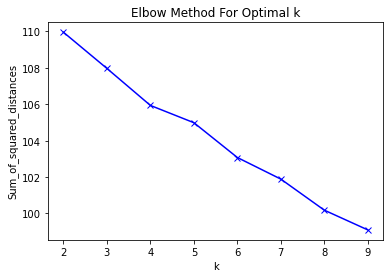

In [144]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2, 10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10, random_state=6886)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, "bx-")
plt.xlabel("k")
plt.ylabel("Sum_of_squared_distances")
plt.title("Elbow Method For Optimal k")
plt.show()

2:['position', 'cc program manager', 'community connections', 'irex', 'program', 'yerevan office', 'cc', 'intern', 'applicants', 'armenia', 'cc program', 'cc staff', 'program staff', 'cc filing system', 'interested parties', 'general administrative tasks', 'programmatic meetings', 'assisting', 'planning', 'scheduling', 'armenian translation', 'excellent skills', 'armenian languages', 'past english', 'public speaking skills', 'translation experience', 'armenian', 'master', 'english', 'degree']
3:['public outreach', 'public agencies', 'environmental ngos', 'international organizations', 'primary contact', 'network', 'strengthening', 'businesses', 'time position', 'cenn', 'regular electronic communications', 'environmental information', 'general public', 'primary local contact', 'country director', 'armenian ngos', 'armenian offices', 'cenn seminars/ workshops', 'international organizations', 'businesses', 'knowledge/ experience', 'experience', 'degree', 'years', 'field', 'environmental i

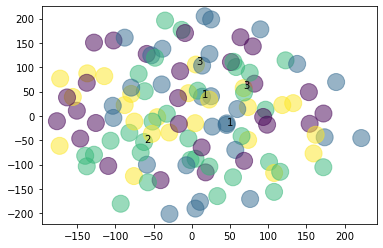

In [146]:
from nltk.cluster import KMeansClusterer
from sklearn import cluster, metrics
from sklearn.manifold import TSNE

NUM_CLUSTERS = 4
kclusterer = KMeansClusterer(
    NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=200
)
assigned_clusters = kclusterer.cluster(X, assign_clusters=True)
# print(assigned_clusters)

for index, sentence in enumerate(corpus):
    print(str(assigned_clusters[index]) + ":" + str(sentence))

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)

labels = kmeans.labels_
centroids = kmeans.cluster_centers_

print("Cluster id labels for inputted data")
# print(labels)
print("Centroids data")
# print(centroids)

print(
    "Score (Opposite of the value of X on the K-means objective which is Sum of distances of samples to their closest cluster center):"
)
print(kmeans.score(X))

silhouette_score = metrics.silhouette_score(X, labels, metric="euclidean")

print("Silhouette_score: ")
print(silhouette_score)

model = TSNE(n_components=3, random_state=0)
np.set_printoptions(suppress=True)

Y = model.fit_transform(X)

plt.scatter(Y[:, 0], Y[:, 1], c=assigned_clusters, s=290, alpha=0.5)

for j in range(len(corpus)):
    plt.annotate(
        assigned_clusters[j],
        xy=(Y[j][0], Y[j][1]),
        xytext=(0, 0),
        textcoords="offset points",
    )
#     print("%s %s" % (assigned_clusters[j], corpus[j]))


plt.show()